In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [2]:
import warnings
warnings.filterwarnings('ignore')



In [3]:
data=pd.read_csv("titanic_train.csv")

In [4]:
df=pd.DataFrame(data=data)

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
df["Name"]=le.fit_transform(df["Name"])
df["Sex"]=le.fit_transform(df["Sex"])
df["Ticket"]=le.fit_transform(df["Ticket"])
df["Cabin"]=le.fit_transform(df["Cabin"])
df["Embarked"]=le.fit_transform(df["Embarked"])

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2


In [12]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,548,1,27.0,0,0,101,13.00,147,2
887,888,1,1,303,0,19.0,0,0,14,30.00,30,2
888,889,0,3,413,0,NaN,1,2,675,23.45,147,2
889,890,1,1,81,1,26.0,0,0,8,30.00,60,0
890,891,0,3,220,1,32.0,0,0,466,7.75,147,1


In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 66.3 KB


In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:>

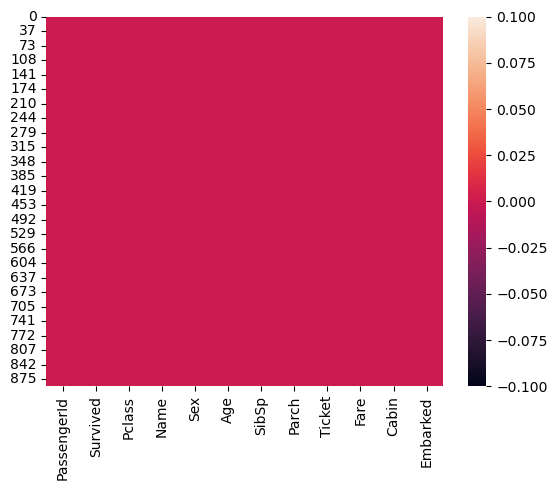

In [19]:
sns.heatmap(df.isnull())

no null data is left in dataset(df)

In [20]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,0.029340,-0.035349,-0.020563,0.024575,0.036847,-0.082398,-0.011617,-0.050895,0.009592,-0.036443,-0.001873
Survived,0.029340,1.000000,-0.359653,-0.036666,-0.538826,-0.077221,-0.017358,0.093317,-0.147710,0.268189,-0.272453,-0.174692
Pclass,-0.035349,-0.359653,1.000000,-0.001854,0.155460,-0.369226,0.067247,0.025683,0.315897,-0.554182,0.692585,0.234857
Name,-0.020563,-0.036666,-0.001854,1.000000,-0.008229,0.062583,-0.083063,-0.031924,0.014055,-0.031997,0.052952,0.012324
Sex,0.024575,-0.538826,0.155460,-0.008229,1.000000,0.093254,-0.103950,-0.246972,0.072565,-0.184994,0.112896,0.102239
Age,0.036847,-0.077221,-0.369226,0.062583,0.093254,1.000000,-0.308247,-0.189119,-0.075934,0.096067,-0.252331,-0.025252
SibSp,-0.082398,-0.017358,0.067247,-0.083063,-0.103950,-0.308247,1.000000,0.383820,0.002864,0.138329,0.038370,0.030121
Parch,-0.011617,0.093317,0.025683,-0.031924,-0.246972,-0.189119,0.383820,1.000000,-0.001576,0.205119,-0.026682,0.009197
Ticket,-0.050895,-0.147710,0.315897,0.014055,0.072565,-0.075934,0.002864,-0.001576,1.000000,-0.028720,0.219424,-0.031119
Fare,0.009592,0.268189,-0.554182,-0.031997,-0.184994,0.096067,0.138329,0.205119,-0.028720,1.000000,-0.522691,-0.277620


<AxesSubplot:>

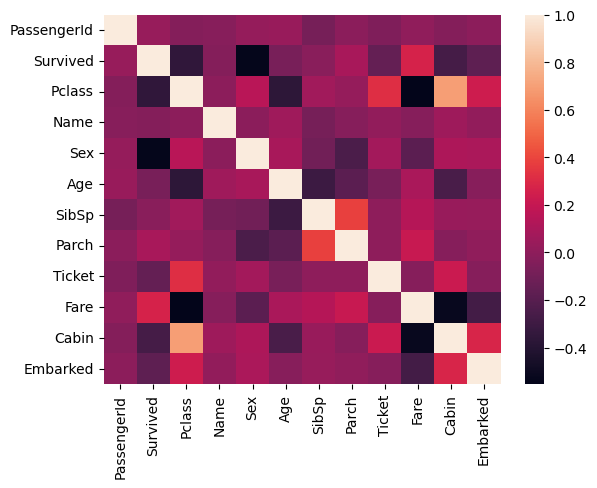

In [21]:
sns.heatmap(df.corr())

Survived have negative correlation with pclass and sex column

In [22]:
df.drop(["Pclass"],axis=1,inplace=True)
df.drop(["Sex"],axis=1,inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,108,22.0,1,0,523,7.2500,147,2
1,2,1,190,38.0,1,0,596,71.2833,81,0
2,3,1,353,26.0,0,0,669,7.9250,147,2
3,4,1,272,35.0,1,0,49,53.1000,55,2
4,5,0,15,35.0,0,0,472,8.0500,147,2


In [24]:
df.describe()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,422.542017,29.699118,0.512605,0.431373,335.406162,34.694514,128.764706,1.599440
std,259.119524,0.491460,264.021184,14.526497,0.929783,0.853289,203.457651,52.918930,37.548444,0.781483
min,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,189.250000,20.125000,0.000000,0.000000,152.250000,8.050000,144.000000,2.000000
50%,445.000000,0.000000,397.500000,28.000000,0.000000,0.000000,331.000000,15.741700,147.000000,2.000000
75%,677.750000,1.000000,656.750000,38.000000,1.000000,1.000000,530.750000,33.375000,147.000000,2.000000
max,891.000000,1.000000,889.000000,80.000000,5.000000,6.000000,680.000000,512.329200,147.000000,3.000000


key observations-

1- No skewness in datasets as mean is not more then median(50%).

2- outliers are present in data(df) as there is difference in 75% and max

In [25]:
df.skew()

PassengerId   -0.000609
Survived       0.382945
Name           0.128767
Age            0.389108
SibSp          2.519577
Parch          2.618914
Ticket         0.046970
Fare           4.653630
Cabin         -1.966219
Embarked      -1.464192
dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

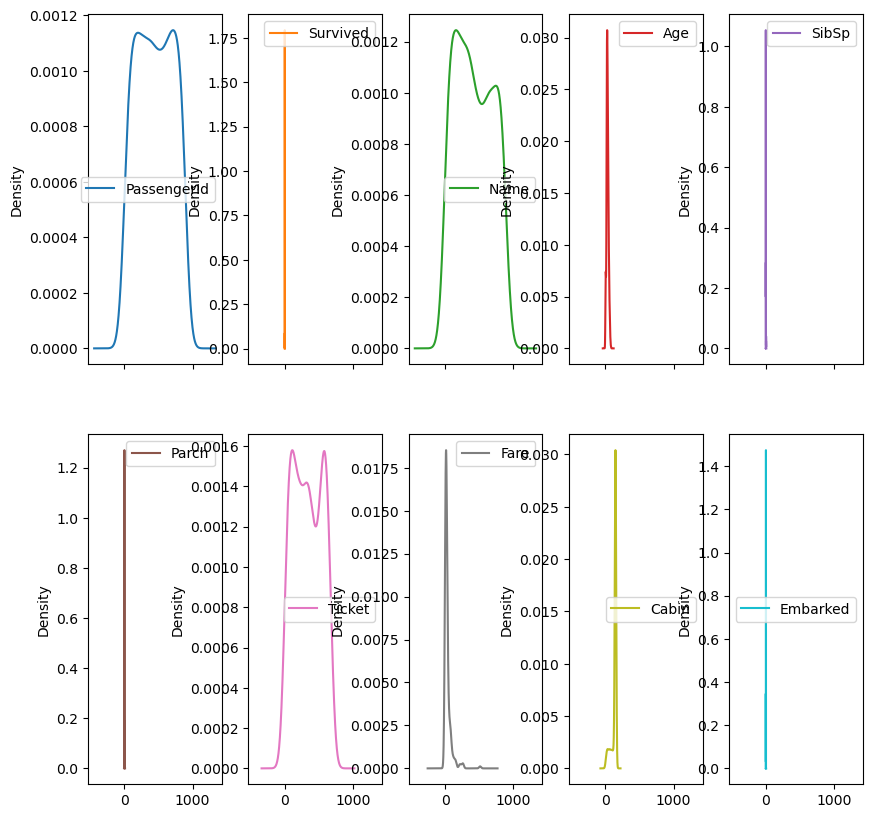

In [26]:
df.plot(kind="kde",subplots=True,layout=(2,5),figsize=(10,10))

No skewness is found in dataset(df)

PassengerId       AxesSubplot(0.125,0.53;0.133621x0.35)
Survived       AxesSubplot(0.285345,0.53;0.133621x0.35)
Name            AxesSubplot(0.44569,0.53;0.133621x0.35)
Age            AxesSubplot(0.606034,0.53;0.133621x0.35)
SibSp          AxesSubplot(0.766379,0.53;0.133621x0.35)
Parch             AxesSubplot(0.125,0.11;0.133621x0.35)
Ticket         AxesSubplot(0.285345,0.11;0.133621x0.35)
Fare            AxesSubplot(0.44569,0.11;0.133621x0.35)
Cabin          AxesSubplot(0.606034,0.11;0.133621x0.35)
Embarked       AxesSubplot(0.766379,0.11;0.133621x0.35)
dtype: object

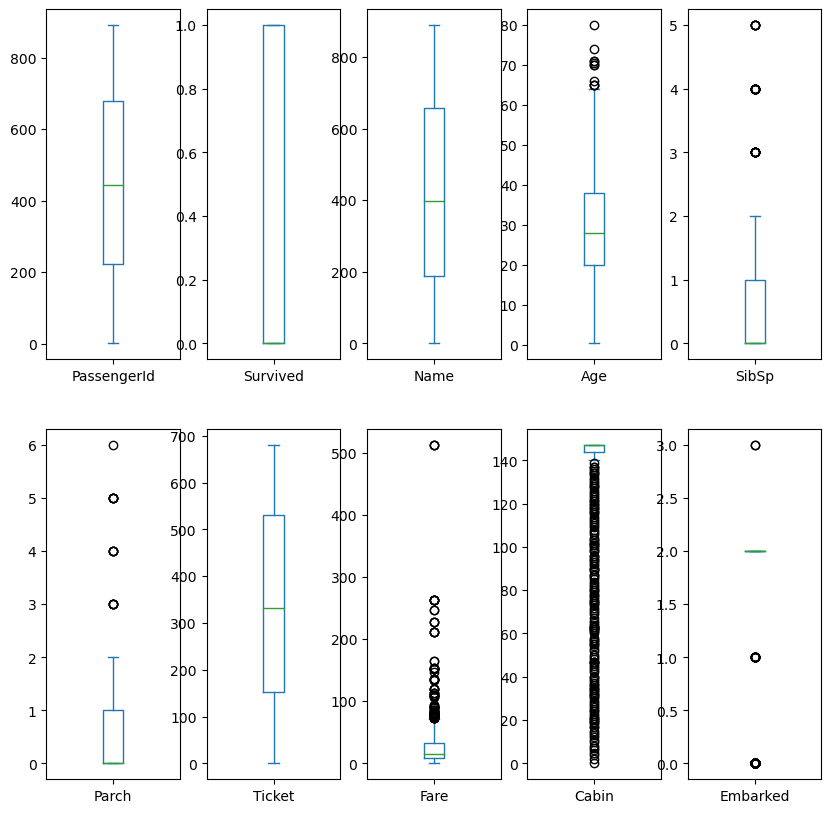

In [28]:
df.plot(kind="box",subplots=True,layout=(2,5),figsize=(10,10))

lets work for outliers

In [29]:
from scipy.stats import zscore

In [30]:
z=np.abs(zscore(df))

In [31]:
z

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.728532,0.82702,1.192187,0.530377,0.524570,0.505895,0.922675,0.518978,0.485988,0.512924
1,1.724670,1.20916,0.881388,0.571831,0.524570,0.505895,1.281724,0.691897,1.272974,2.048108
2,1.720808,1.20916,0.263580,0.254825,0.551703,0.505895,1.640772,0.506214,0.485988,0.512924
3,1.716946,1.20916,0.570589,0.365167,0.524570,0.505895,1.408681,0.348049,1.965898,0.512924
4,1.713084,0.82702,1.544678,0.365167,0.551703,0.505895,0.671833,0.503850,0.485988,0.512924
...,...,...,...,...,...,...,...,...,...,...
885,1.689274,0.82702,0.990986,0.640719,0.551703,5.357890,0.711181,0.105320,0.485988,0.767592
886,1.693136,0.82702,0.475515,0.185937,0.551703,0.505895,1.152920,0.410245,0.485988,0.512924
887,1.696998,1.20916,0.453092,0.737041,0.551703,0.505895,1.580828,0.088774,2.632171,0.512924
889,1.704722,1.20916,1.294523,0.254825,0.551703,0.505895,1.610338,0.088774,1.832643,2.048108


In [32]:
threashold=3
print(np.where(z>3))

(array([ 12,  15,  20,  22,  23,  36,  44,  51,  54,  66,  67,  74,  93,
        94, 132, 134, 137, 140, 145, 167, 188, 208, 210, 214, 223, 241,
       248, 274, 288, 301, 304, 309, 350, 351, 351, 357, 383, 429, 430,
       442, 449, 462, 473, 482, 498, 498, 505, 512, 536, 537, 540, 543,
       546, 555, 569, 581, 586, 587, 587, 589, 617, 620, 627, 643, 650,
       660, 678, 679, 686, 693, 709], dtype=int64), array([5, 4, 8, 5, 7, 4, 4, 4, 4, 5, 7, 8, 7, 4, 4, 5, 4, 8, 4, 8, 4, 7,
       4, 4, 4, 7, 7, 7, 5, 7, 7, 4, 5, 5, 7, 8, 4, 4, 4, 8, 5, 8, 8, 5,
       3, 8, 5, 8, 5, 7, 4, 4, 7, 7, 7, 7, 5, 7, 8, 7, 5, 7, 4, 8, 4, 4,
       4, 3, 5, 8, 5], dtype=int64))


In [33]:
df_n=df[(z<3).all(axis=1)]

In [34]:
df_n

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,108,22.0,1,0,523,7.2500,147,2
1,2,1,190,38.0,1,0,596,71.2833,81,0
2,3,1,353,26.0,0,0,669,7.9250,147,2
3,4,1,272,35.0,1,0,49,53.1000,55,2
4,5,0,15,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...
884,885,0,793,25.0,0,0,650,7.0500,147,2
886,887,0,548,27.0,0,0,101,13.0000,147,2
887,888,1,303,19.0,0,0,14,30.0000,30,2
889,890,1,81,26.0,0,0,8,30.0000,60,0


In [35]:
df=df_n

In [36]:
df.shape

(646, 10)

In [37]:
x=df.drop(["Survived"],axis=1)

In [38]:
x

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,108,22.0,1,0,523,7.2500,147,2
1,2,190,38.0,1,0,596,71.2833,81,0
2,3,353,26.0,0,0,669,7.9250,147,2
3,4,272,35.0,1,0,49,53.1000,55,2
4,5,15,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...
884,885,793,25.0,0,0,650,7.0500,147,2
886,887,548,27.0,0,0,101,13.0000,147,2
887,888,303,19.0,0,0,14,30.0000,30,2
889,890,81,26.0,0,0,8,30.0000,60,0


In [39]:
y=df["Survived"]

In [40]:
y

0      0
1      1
2      1
3      1
4      0
      ..
884    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 646, dtype: int64

In [78]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.24,random_state=48)

In [79]:
lg=LogisticRegression()

In [80]:
lg

LogisticRegression()

In [81]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [82]:
lg.score(xtrain,ytrain)

0.7224489795918367

In [83]:
lpred=lg.predict(xtest)

In [84]:
print("Accuracy score",accuracy_score(ytest,lpred))
print("confusion matrix",confusion_matrix(ytest,lpred))
print("Classification report",classification_report(ytest,lpred))

Accuracy score 0.6474358974358975
confusion matrix [[78 14]
 [41 23]]
Classification report               precision    recall  f1-score   support

           0       0.66      0.85      0.74        92
           1       0.62      0.36      0.46        64

    accuracy                           0.65       156
   macro avg       0.64      0.60      0.60       156
weighted avg       0.64      0.65      0.62       156



In [85]:
#lets take a sample data
p=np.array([1,108,22.0,1,0,523,7.2500,147,2])

In [86]:
p=p.reshape(1,-1)

In [87]:
lg.predict(p)

array([0], dtype=int64)

The model is predicting the value of Survived perfectely

hence the model is well trainied 